White House Logs

Date: 4/6/2025

Name: Billie Adkins


References:

https://github.com/azharmunir43/whitehouse-visitor-logs-etl-pipeline

Data can be downloaded as .csv files from:

https://content.bellevue.edu/cst/dsc/640/2024Update/Datasets/Weeks3%264Exercise.zip


### Assignment Code

In [4]:
# Import libraries needed for assignment 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [5]:
# Assigns variables to datasets of monthly White House Visitor Logs
data_202304 = pd.read_csv('2023.04_WAVES-ACCESS-RECORDS.csv', low_memory=False)
data_202305 = pd.read_csv('2023.05_WAVES-ACCESS-RECORDS.csv', low_memory=False)
data_202306 = pd.read_csv('2023.06_WAVES-ACCESS-RECORDS.csv', low_memory=False)
data_202307 = pd.read_csv('2023.07_WAVES-ACCESS-RECORDS.csv', low_memory=False)
data_202308 = pd.read_csv('2023.08_WAVES-ACCESS-RECORDS.csv', low_memory=False)
data_202309 = pd.read_csv('2023.09_WAVES-ACCESS-RECORDS.csv', low_memory=False)

In [6]:
# Assigns data_dict to dictionary of keys and values of variables holding .csv files
data_dict = {'data_202304': data_202304, 'data_202305': data_202305, 'data_202306': data_202306, 'data_202307': data_202307, 'data_202308': data_202308, 'data_202309': data_202309}

# Assigns month_list variable to yyyymm to iterate through data_dict
month_list = ['202304', '202305', '202306', '202307', '202308', '202309']

# Assigns empty list to combined_data variable
combined_data = []

# Iterates through each month in the month list to assign to each variable
for month in month_list:
    # Assigns each file from data_dict variable to dataframe
    df = data_dict[f"data_{month}"]
    
    # Assigns the yyyymm for each iteration through files to the MonthYear of the dataframe 
    df['MonthYear'] = f"{month[:4]}-{month[4:6]}-01"
    
    # Appends each monthly files dataframe to the combined_data list
    combined_data.append(df)

In [7]:
# Combines all dataframes in combined_data into visitor_data variable
visitor_data = pd.concat(combined_data, ignore_index=True)
# visitor_data
# visitor_data.info()

In [8]:
# Assigns visitor_trend to sum of Total People by each Month and Year in visitor data
visitor_trend = visitor_data.groupby('MonthYear').agg({'Total People': 'sum'})
#visitor_trend.index = pd.to_datetime(visitor_trend.index)

In [9]:
# visitor_trend

In [10]:
# visitor_trend.loc['2023-06-01', 'Total People']

In [11]:
# visitor_trend.index

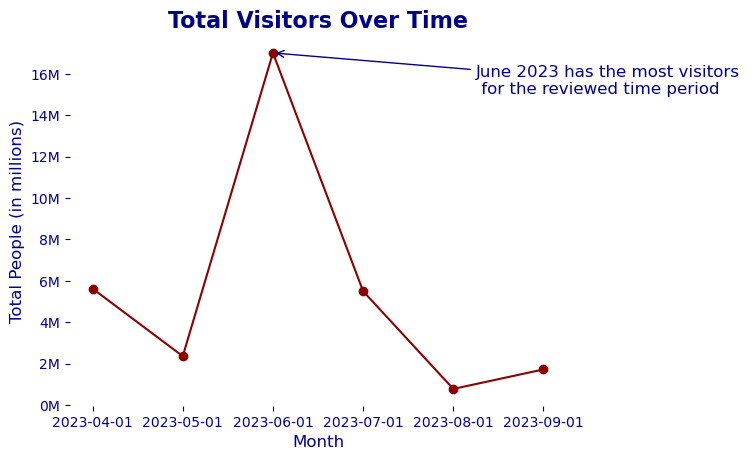

In [12]:
#### CHART # 1
## line chart
# Shows most visitors in June

# Creates chart -- uses colors that are color-blind friendly (darkred and darkblue)
plt.plot(visitor_trend.index, visitor_trend['Total People'], marker='o', color='darkred')
plt.title("Total Visitors Over Time", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Month", fontsize=12, color='darkblue')
plt.ylabel("Total People (in millions)", fontsize=12, color='darkblue')
plt.tick_params(axis='x', colors='darkblue')  
plt.tick_params(axis='y', colors='darkblue')  
# Sets the y-axis to show in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x / 1000000)}M'))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # 'MMM-YYYY'

# Removes chart border by setting visibility to False
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Put note on chart
plt.annotate('June 2023 has the most visitors \n for the reviewed time period', 
             xy=(visitor_trend.index.get_loc('2023-06-01'), visitor_trend.loc['2023-06-01', 'Total People']),
             xytext=(visitor_trend.index.get_loc('2023-06-01') + 2.25, visitor_trend.loc['2023-06-01', 'Total People'] - 2000000),
             arrowprops=dict(color='darkblue', arrowstyle="->", lw=1),
             fontsize=12, color='darkblue', fontweight='regular')

# Save then show plot
plt.savefig("TotalVisitorsByMonth.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [13]:
df = visitor_data
# df

In [14]:
# Converts to datetime format
df['Appointment Start Date'] = pd.to_datetime(df['Appointment Start Date'], format='mixed')

# Creates column of the hour of the day for the Appointment Start Date
df['Appointment Start Date Hour'] = df['Appointment Start Date'].dt.hour

# Assigns df_filtered to June 2023 data where group ID is not null
df_filtered = df[(df['UIN'].notnull()) & (df['MonthYear'] == '2023-06-01')]

# Group the data by Appointment Start Date Hour and count the unique groups
uin_counts = df_filtered.groupby('Appointment Start Date Hour')['UIN'].nunique().reset_index()
uin_counts.rename(columns={'UIN': 'Total UINs'}, inplace=True)

In [15]:
df_filtered.columns

Index(['Last Name', 'First Name', 'Middle Initial', 'UIN', 'BDGNBR',
       'Access Type', 'TOA', 'POA', 'TOD', 'POD', 'Appointment Made Date',
       'Appointment Start Date', 'Appointment End Date',
       'Appointment Cancel Date', 'Total People', 'Last Updated By', 'POST',
       'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
       'Visitee First Name', 'Meeting Location', 'Meeting Room',
       'Caller Last Name', 'Caller First Name', 'Caller Room', 'Release Date',
       'MonthYear', 'Appointment Start Date Hour'],
      dtype='object')

In [16]:
# Assigns location_counts to the number of unique group IDs by Meeting Location and scheduled starting hour
location_counts = df_filtered.groupby(['Appointment Start Date Hour', 'Meeting Location'])['UIN'].nunique().reset_index()
location_counts.rename(columns={'UIN': 'Total UINs'}, inplace=True)

# Reformats the data to create a stacked bar chart
location_pivot = location_counts.pivot(index='Appointment Start Date Hour', columns='Meeting Location', values='Total UINs').fillna(0)

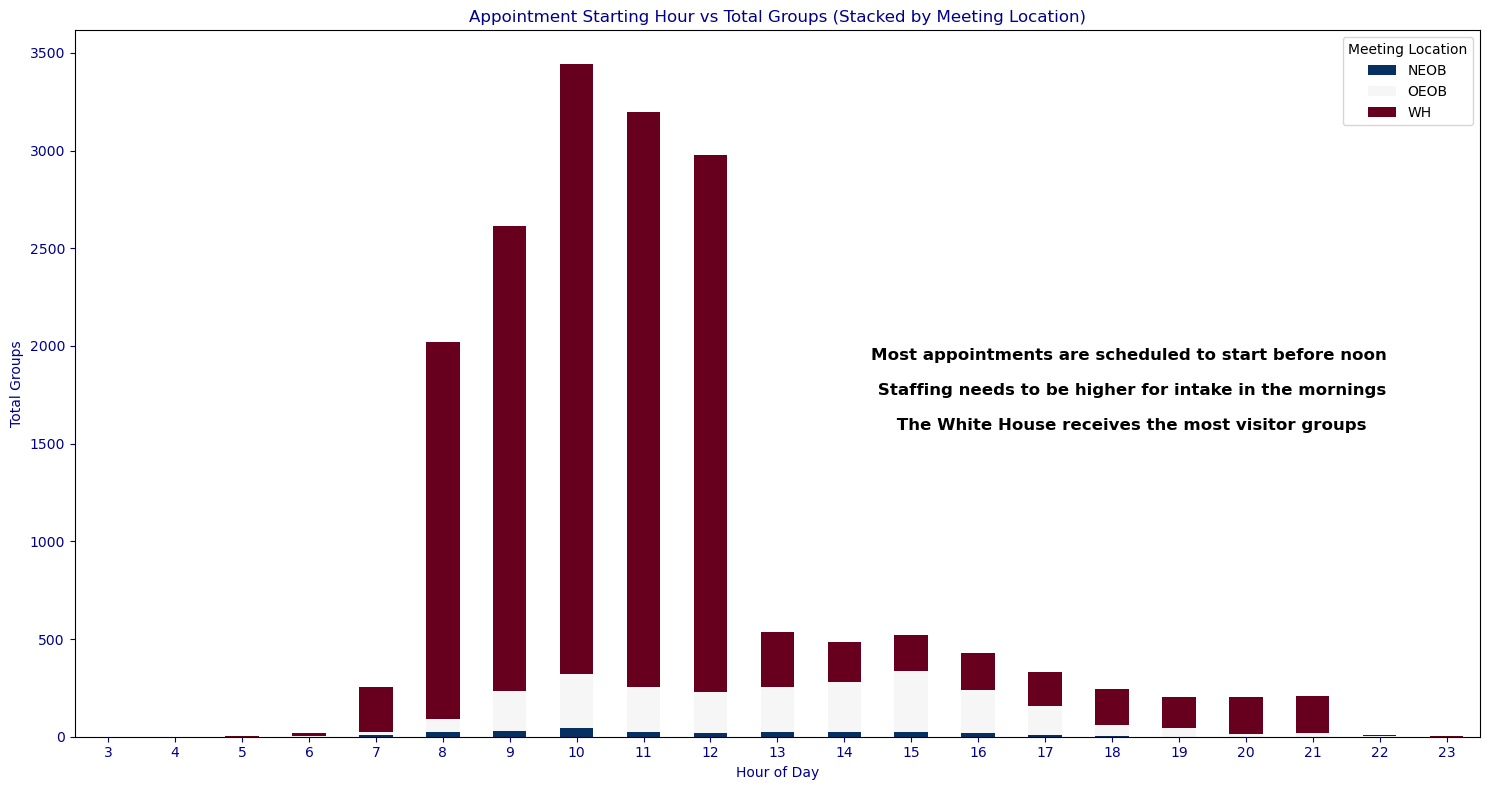

In [17]:
#### CHART # 2
## stacked bar chart
# Shows most visitors scheduled before noon
## WH gets the most groups of visitors than other Meeting Locations

# Creates chart
location_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='RdBu_r')
plt.title('Appointment Starting Hour vs Total Groups (Stacked by Meeting Location)', color='darkblue')
plt.xlabel('Hour of Day', color='darkblue')
plt.ylabel('Total Groups', color='darkblue')
plt.tick_params(axis='x', colors='darkblue')  
plt.tick_params(axis='y', colors='darkblue')  
plt.xticks(rotation=0)
plt.tight_layout()

# Put note on chart
plt.annotate('Most appointments are scheduled to start before noon\n' 
             '\n Staffing needs to be higher for intake in the mornings\n'
             '\n The White House receives the most visitor groups\n', 
             xy=(0.75, 0.55), xycoords='axes fraction', ha='center', va='top', fontsize=12, color='black', fontweight='bold')

# Save then show plot
plt.savefig("Groups by Meeting Location and Appointment Hour.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [18]:
# Assigns wh_data to visitor records with Meeting Location as WH
wh_data = df[df['Meeting Location'] == 'WH']

# Assigns meeting_room_counts to the counts of each meeting room in the WH data
meeting_room_counts = wh_data['Meeting Room'].value_counts().reset_index()
meeting_room_counts.columns = ['Meeting Room', 'Total Appointments']

# Assigns top_10_meeting_rooms to the most frequent Meeting Rooms
top_10_meeting_rooms = meeting_room_counts.head(10)
top_10_meeting_rooms

,Meeting Room,Total Appointments
0,EW TOUR,281422
1,SOUTH LAWN,24828
2,WEST WING,23243
3,EW 216,9655
4,EW - RES,8946
5,EW-RES,3340
6,WH-RES,2327
7,East Room,2118
8,EW206,1881
9,Res/South Lawn,1722


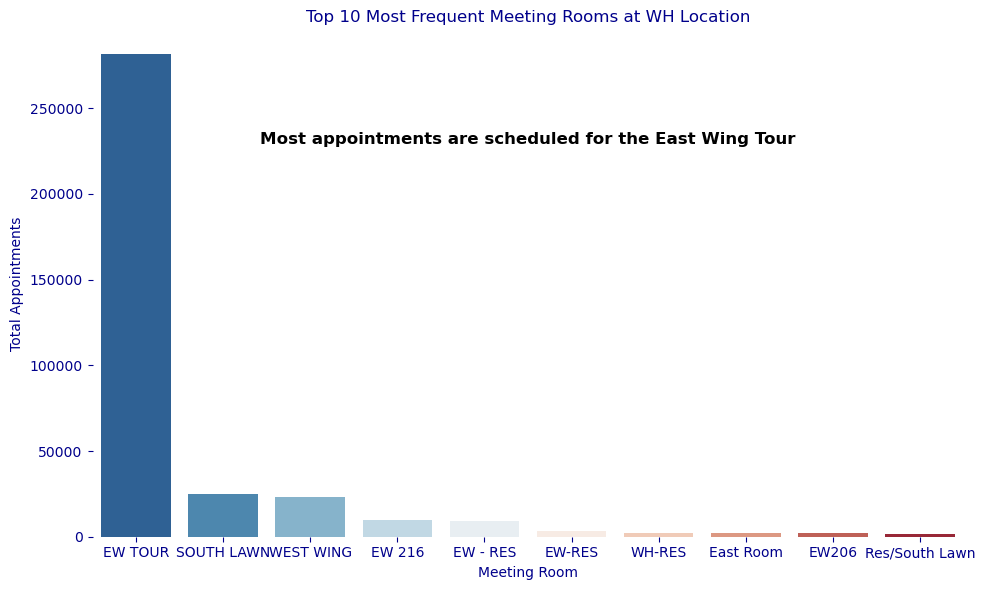

In [19]:
#### CHART # 3
## bar chart
# EW Tour has most appointments scheduled so staff will primarily be reviewed for the tours 
## (still including all tours based on exploratory data analysis)

# Creates chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_meeting_rooms, x='Meeting Room', y='Total Appointments', hue='Meeting Room', palette='RdBu_r')
plt.title('Top 10 Most Frequent Meeting Rooms at WH Location',color='darkblue')
plt.xlabel('Meeting Room', color='darkblue')
plt.ylabel('Total Appointments', color='darkblue')
plt.tick_params(axis='x', colors='darkblue')  
plt.tick_params(axis='y', colors='darkblue')  
plt.tight_layout()

# Put note on chart
plt.annotate('Most appointments are scheduled for the East Wing Tour',
             xy=(0.5, 0.80), xycoords='axes fraction', ha='center', va='top', fontsize=12, color='black', fontweight='bold')

# Removes chart border by setting visibility to False
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Save then show plot
plt.savefig("top_10_meeting_rooms.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [20]:
# Creates column with Appointment Date
df['Appointment Date'] = df['Appointment Start Date'].dt.date

# Assigns wh_tour_data to WH tours in June 2023
wh_tour_data = df[(df['Meeting Location'] == 'WH') & 
                  (df['Meeting Room'].str.contains('tour', case=False, na=False)) & 
                  (df['MonthYear'] == '2023-06-01')]

In [21]:
# Assigns appointment_counts to count of appointments by date and meeting room in the WH tour data 
appointment_counts = wh_tour_data.groupby(['Appointment Date', 'Meeting Room']).size().reset_index(name='Count')

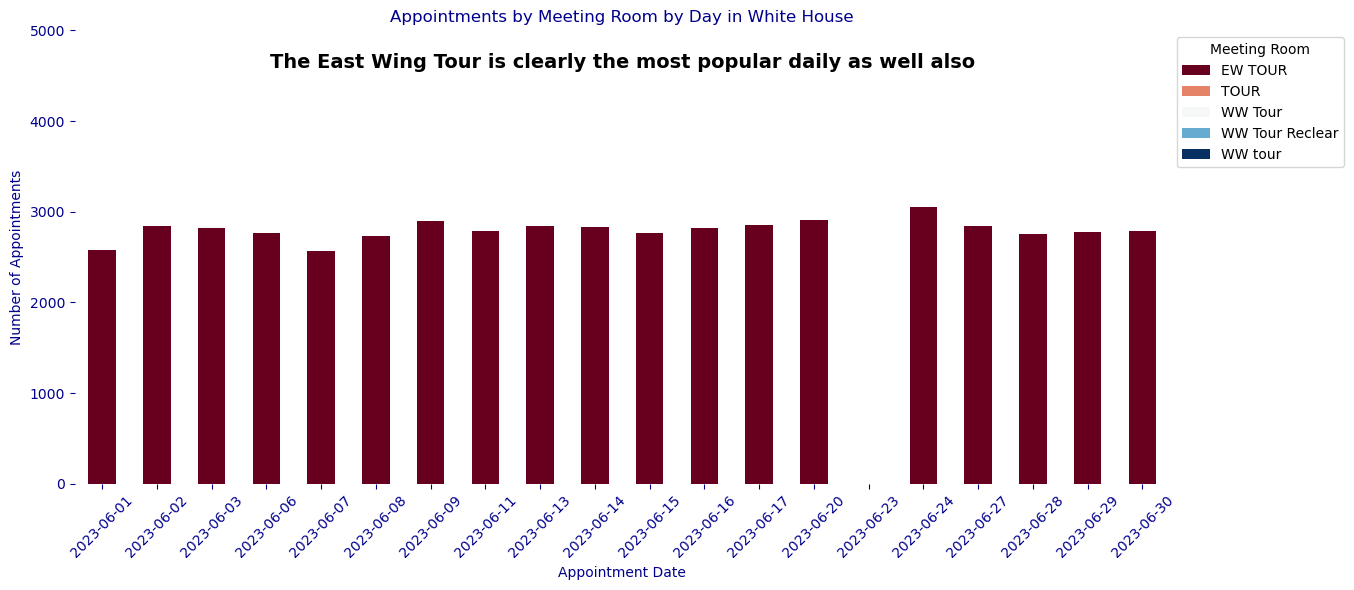

In [22]:
#### CHART # 4
## stacked bar chart
## Shows EW TOUR is still most popular 'Meeting Room' scheduled for appointments daily 
## as well as overall (see chart 3)

# Creates chart
appointment_pivot = appointment_counts.pivot_table(index='Appointment Date', columns='Meeting Room', values='Count', aggfunc='sum').fillna(0)
appointment_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='RdBu')
plt.title('Appointments by Meeting Room by Day in White House', color='darkblue')
plt.xlabel('Appointment Date', color='darkblue')
plt.ylabel('Number of Appointments', color='darkblue')
plt.tick_params(axis='x', colors='darkblue')  
plt.tick_params(axis='y', colors='darkblue')  
plt.xticks(rotation=45)
plt.ylim(0, 5000) 
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Meeting Room")

# Puts note on chart
plt.annotate('The East Wing Tour is clearly the most popular daily as well also',
             xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='top', fontsize=14, color='black', fontweight='bold')

# Removes chart border by setting visibility to False
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Save then show plot
plt.savefig("stacked_tour_appointments_by_day.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

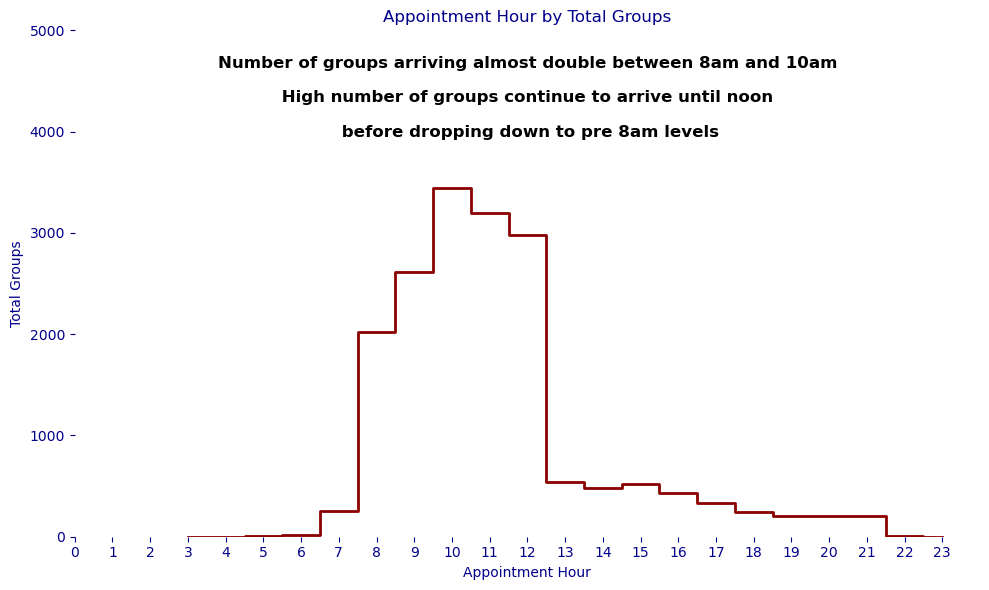

In [23]:
#### CHART # 5
# step chart to show how many groups we will need staff for at certain hours of day
## Number of groups arriving appears to be double between 8am and 10am 
## and stays high until noon before droppng drastically to pre 8am levels

# Create chart
plt.figure(figsize=(10, 6))
plt.step(uin_counts['Appointment Start Date Hour'], uin_counts['Total UINs'], where='mid', color='darkred', linewidth=2)
plt.title('Appointment Hour by Total Groups', color='darkblue')
plt.xlabel('Appointment Hour', color='darkblue')
plt.ylabel('Total Groups', color='darkblue')
plt.tick_params(axis='x', colors='darkblue')  
plt.tick_params(axis='y', colors='darkblue') 
plt.xticks(range(0, 24))
# plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 5000) 

# Puts note on chart
plt.annotate('Number of groups arriving almost double between 8am and 10am\n'
             '\n High number of groups continue to arrive until noon \n'
             '\n before dropping down to pre 8am levels',
             xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='top', fontsize=12, color='black', fontweight='bold')

# Removes chart border by setting visibility to False
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save then show plot
plt.savefig("Total Groups by Appointment Start Time.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

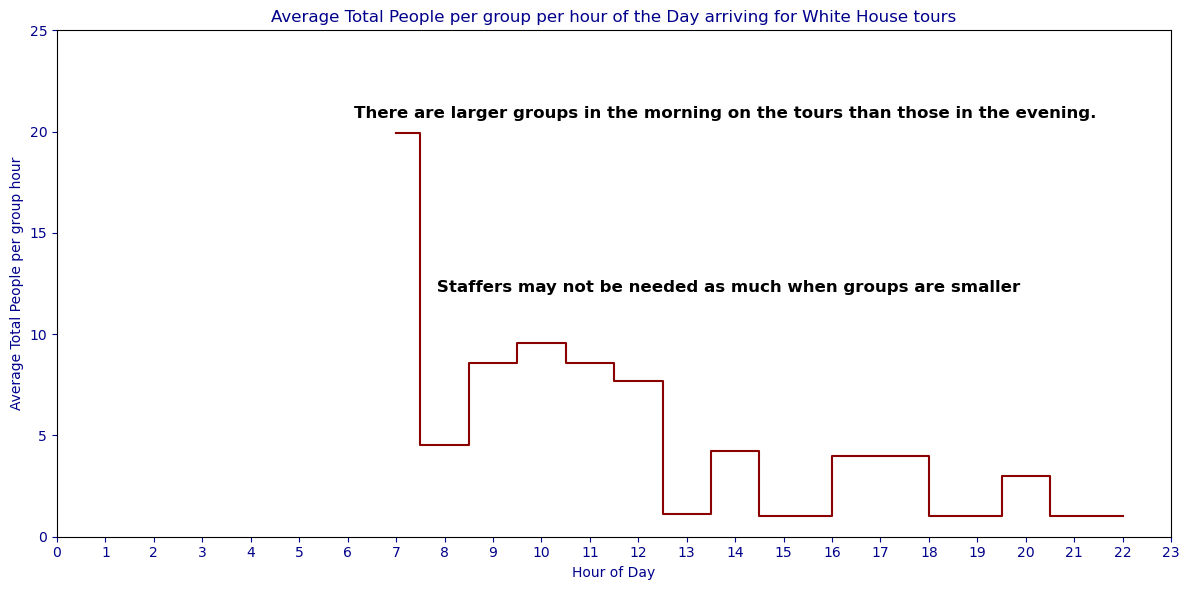

In [24]:
#### CHART # 6
# step chart to show total people arriving throughout the day
## There are larger groups in the morning on the tours than those in the evening.  
## Staffers may not be needed as much when groups are smaller

# Set to copy to avoid error message
wh_tour_data = wh_tour_data.copy()

# Creates a column in wh_tour_data for the hour of the day
wh_tour_data.loc[:, 'hour'] = wh_tour_data['Appointment Start Date'].dt.hour

# Average people per hour arriving for tours
avg_people_per_hour = wh_tour_data.groupby('hour')['Total People'].mean().reset_index()

# Create chart
plt.figure(figsize=(12, 6))
plt.step(avg_people_per_hour['hour'], avg_people_per_hour['Total People'], where='mid', color='darkred', marker='')
plt.title('Average Total People per group per hour of the Day arriving for White House tours', color='darkblue')
plt.xlabel('Hour of Day', color='darkblue')
plt.ylabel('Average Total People per group hour', color='darkblue')
plt.tick_params(axis='x', colors='darkblue')  
plt.tick_params(axis='y', colors='darkblue') 
plt.xticks(range(0,24))
plt.yticks(range(0,30,5))
plt.grid(False)
plt.tight_layout()

# Put note on chart
plt.annotate('There are larger groups in the morning on the tours than those in the evening.\n'
             '\n\n\n\n\n\n\n\n\n Staffers may not be needed as much when groups are smaller',
             xy=(0.60, 0.85), xycoords='axes fraction', ha='center', va='top', fontsize=12, color='black', fontweight='bold')

# Save then show plot
plt.savefig("Average people starting white house tour per hour.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()